# **South African Language Identification Hack 2023**

# **Overview**

Welcome to the South African Language Identification Hack 2023! 
This hackathon is part of the ExploreAI Academy Classification Hackathon series, focusing on the linguistic diversity of South Africa. 
South Africa is a multicultural society with 11 official languages, each enjoying equal status. 
This challenge involves identifying the language of a given text among the 11 official languages, showcasing the application of Natural Language Processing (NLP) in language identification."

# **Problem Statement**
Develop a language identification system for South Africa's 11 official languages, enabling accurate recognition of text languages. Evaluation based on Mean F1-Score, emphasizing precision and recall balance.

# 1. Importing Packages

In [57]:
# Data manipulation and analysis
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP) tools
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Model evaluation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV

# Other utilities
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  # Import word_tokenize explicitly
from nltk.stem import WordNetLemmatizer


# 2.Load Dataset

In [33]:
train_df = pd.read_csv(r"C:\Users\Nonkanyiso\Language-Identification-Hack-2023\train_set.csv")
test_df = pd.read_csv(r"C:\Users\Nonkanyiso\Language-Identification-Hack-2023\test_set.csv")

# 3.Data description

# 4. Exploratory Data Analysis

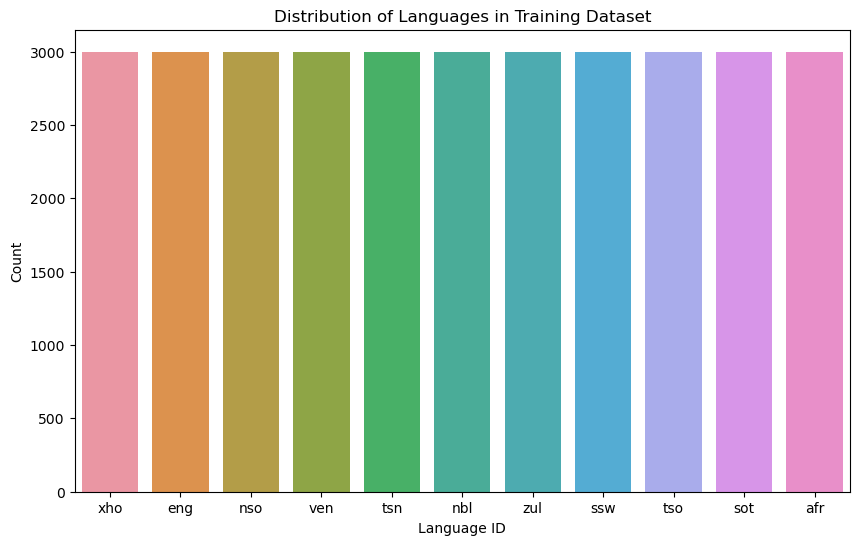

In [34]:
# Visualize the distribution of languages in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='lang_id', data=train_df)
plt.title('Distribution of Languages in Training Dataset')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()

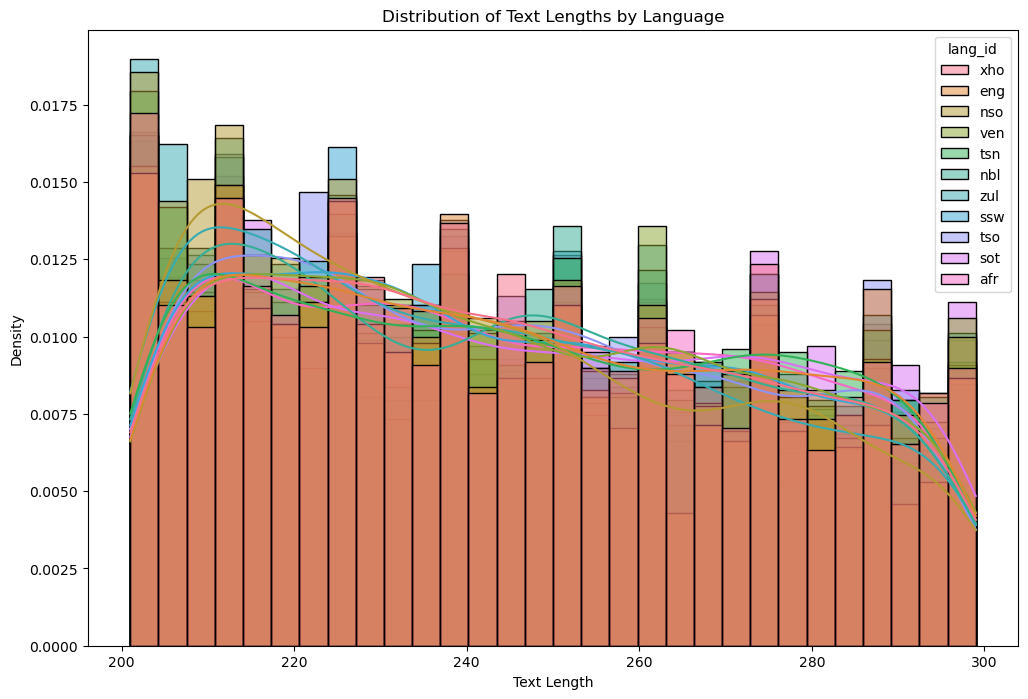

In [35]:
# Explore the distribution of text lengths in each language
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(data=train_df, x='text_length', hue='lang_id', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Distribution of Text Lengths by Language')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

In [36]:
# Visualize the word cloud for each language
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=600, height=300, random_state=42, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


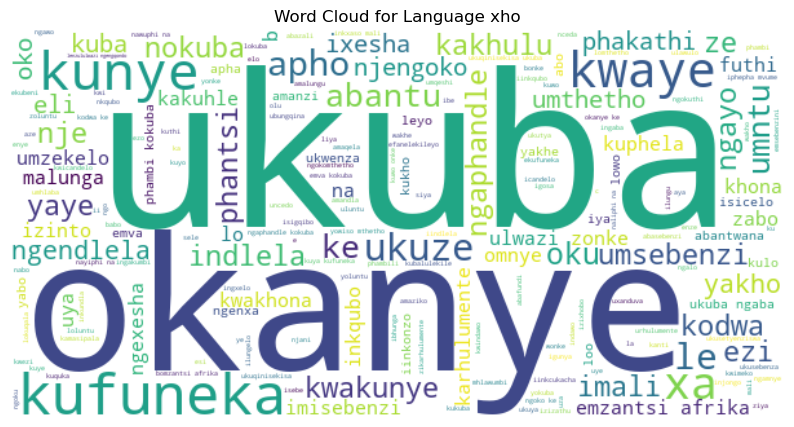

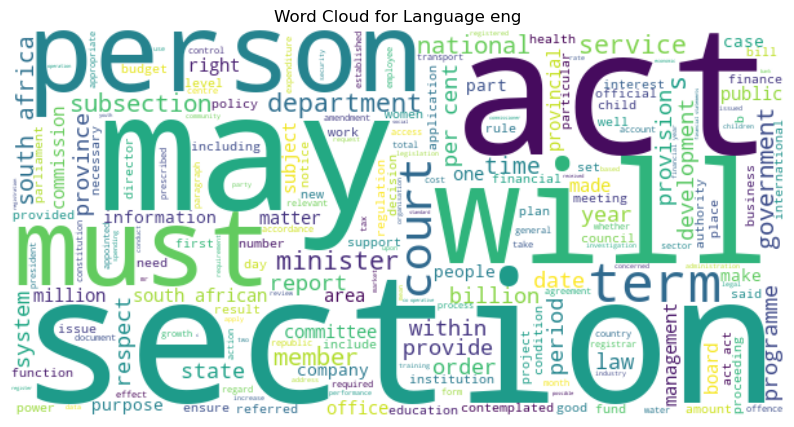

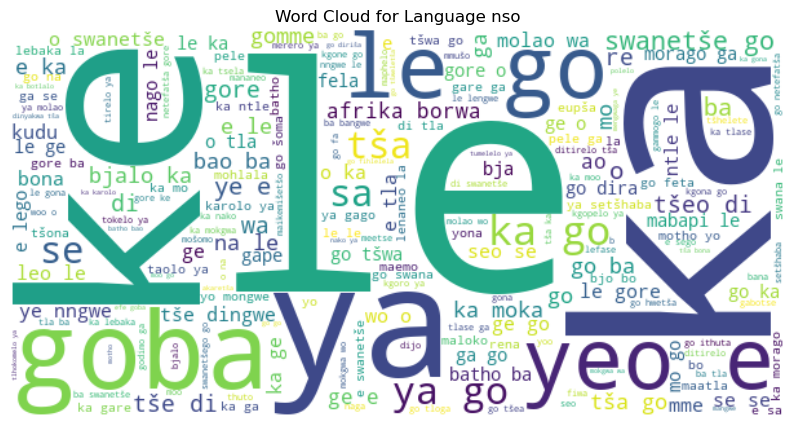

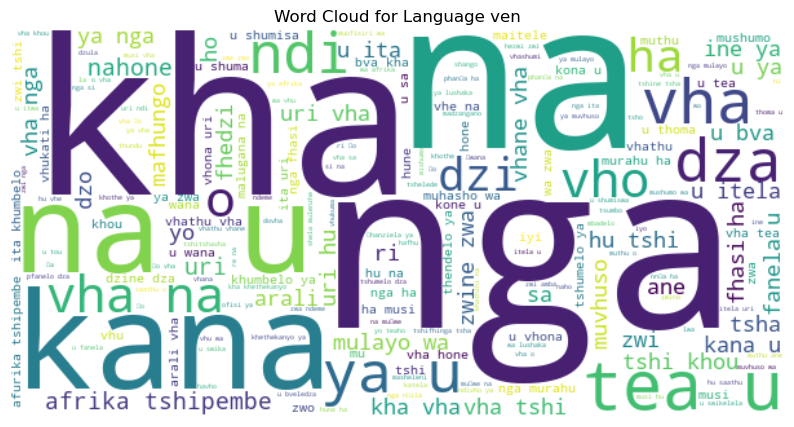

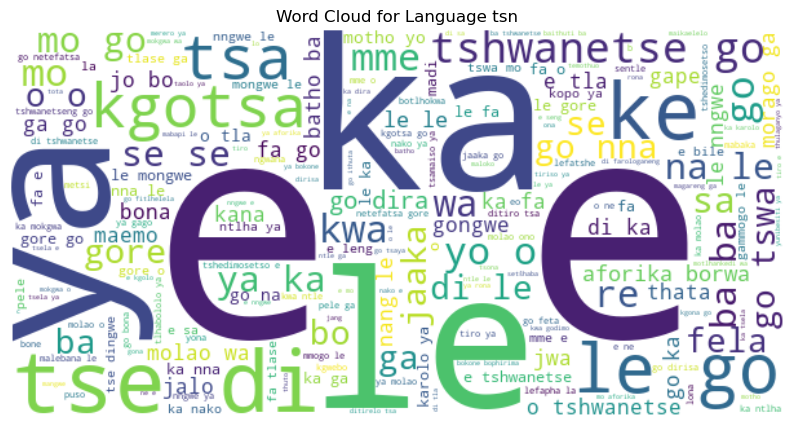

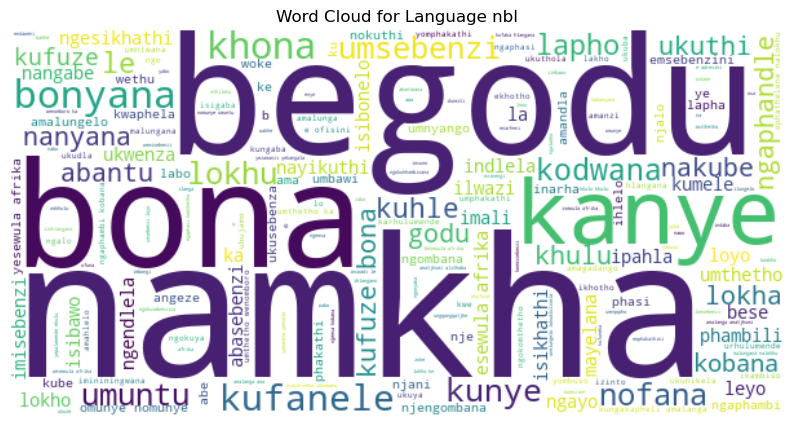

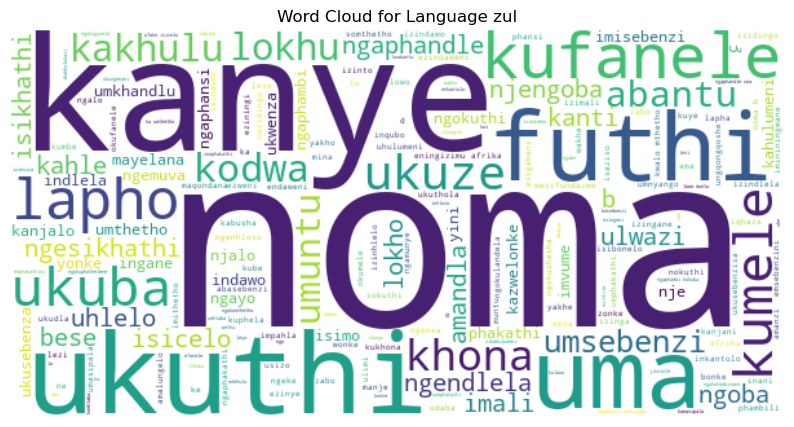

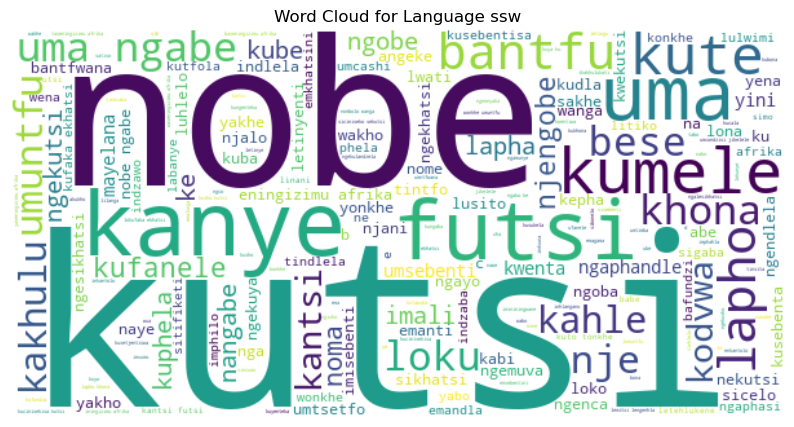

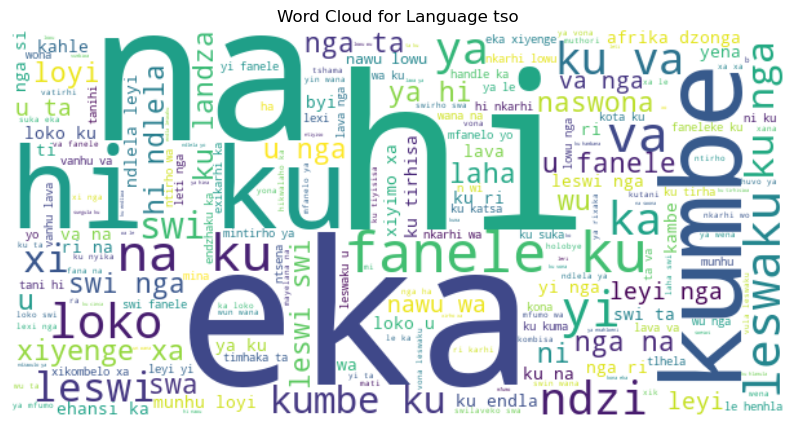

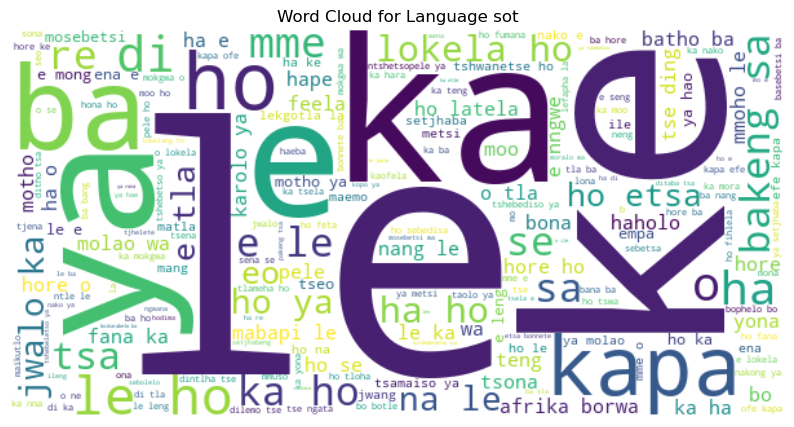

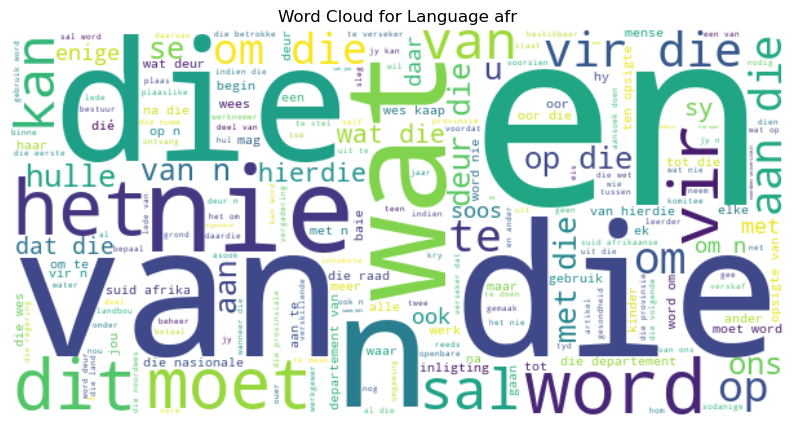

In [37]:
# Generate word clouds for each language
for lang_id in train_df['lang_id'].unique():
    lang_text = ' '.join(train_df[train_df['lang_id'] == lang_id]['text'])
    generate_wordcloud(lang_text, f'Word Cloud for Language {lang_id}')

# 5. Data Cleaning and Engineering

In [38]:
# Check for missing values in the training dataset
missing_values = train_df.isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values)

Missing Values in Training Dataset:
lang_id        0
text           0
text_length    0
dtype: int64


In [39]:
train_df['num_words'] = train_df['text'].apply(lambda x: len(x.split()))

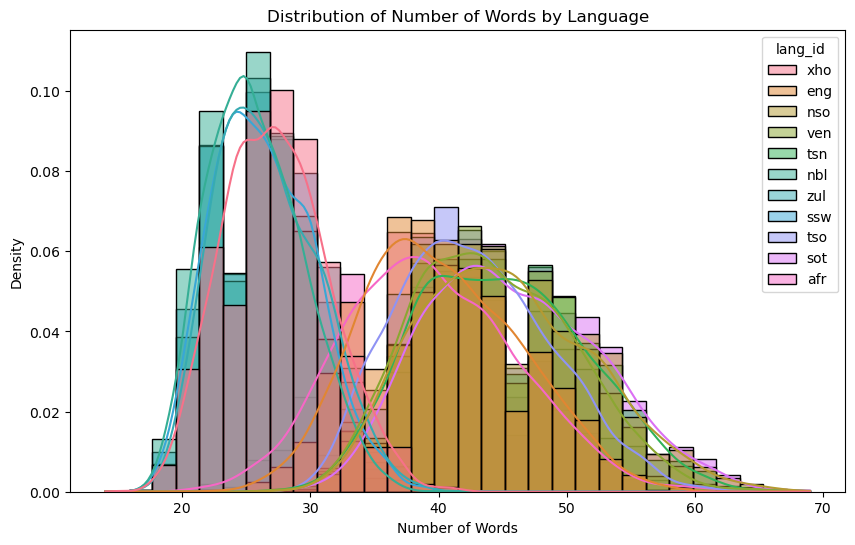

In [40]:
# Explore the distribution of the new feature
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='num_words', hue='lang_id', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Distribution of Number of Words by Language')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

In [41]:
threshold = 500
train_df = train_df[train_df['num_words'] < threshold]

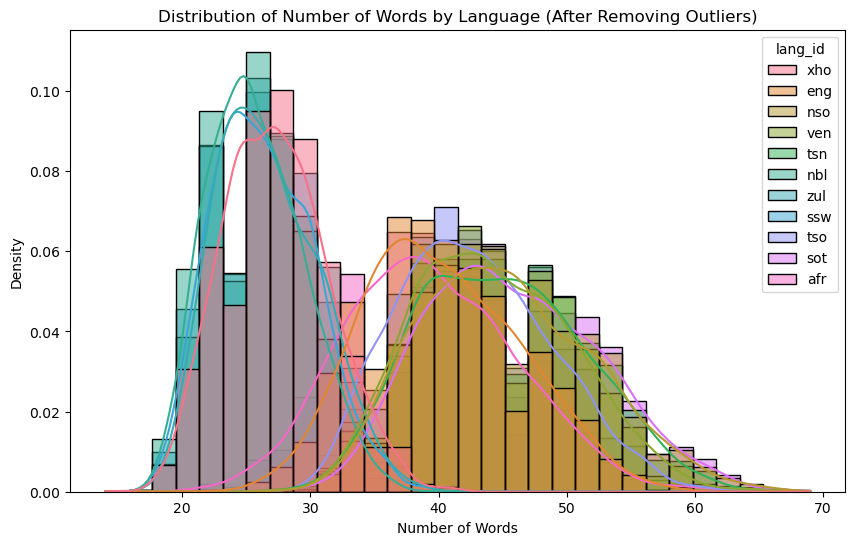

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='num_words', hue='lang_id', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Distribution of Number of Words by Language (After Removing Outliers)')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

# 6. Cleaned data EDA

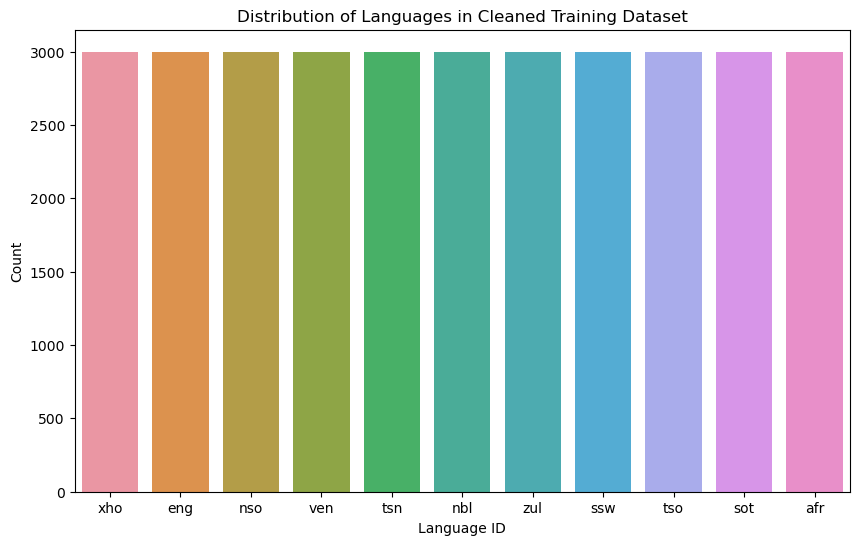

In [43]:
# Visualize the distribution of languages in the cleaned training dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='lang_id', data=train_df)
plt.title('Distribution of Languages in Cleaned Training Dataset')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()

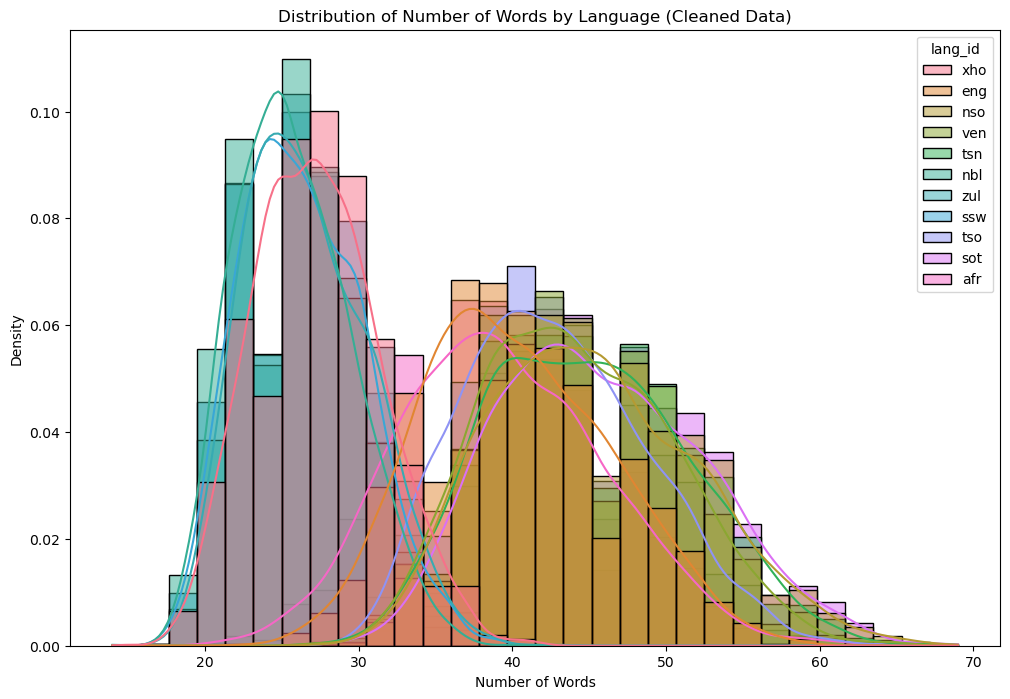

In [44]:
# Explore the distribution of the new feature 'num_words' in each language
plt.figure(figsize=(12, 8))
sns.histplot(data=train_df, x='num_words', hue='lang_id', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Distribution of Number of Words by Language (Cleaned Data)')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

C:\Users\Nonkanyiso\AppData\Local\Temp\ipykernel_25180\3539110806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


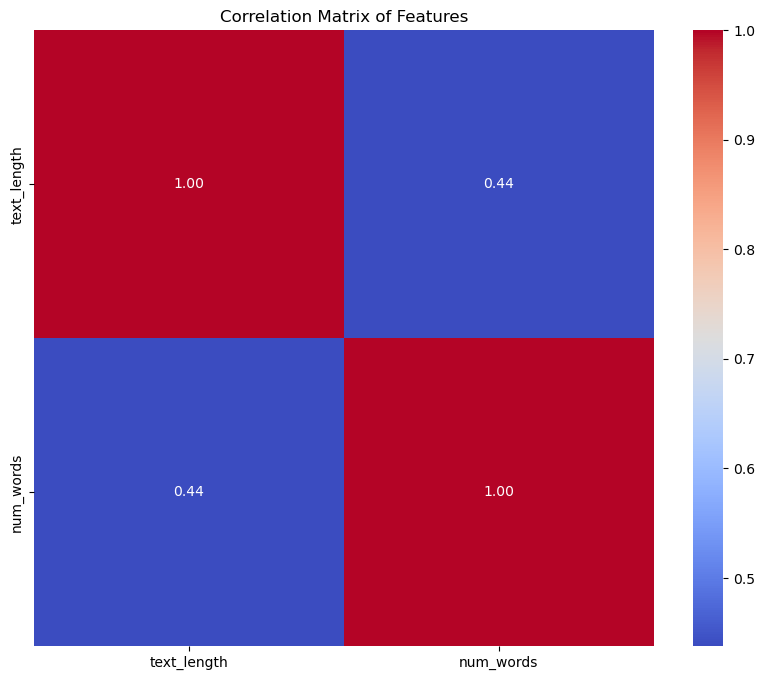

In [45]:
# Visualize the correlation matrix (if applicable)
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 7. Pre Processing

In [68]:
print(test_df['index'].unique())

[1 2]


In [69]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove non-alphabetic characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        # Reassemble the text
        text = ' '.join(tokens)
    elif isinstance(text, int):
        # Convert integer to string
        text = str(text)
    return text

# Apply the same preprocessing to the test data
test_df['cleaned_text'] = test_df['index'].apply(preprocess_text)

In [70]:
# Display the 'cleaned_text' column
print(train_df['cleaned_text'])

0        umgaqosiseko wenza amalungiselelo kumaziko axh...
1        idha iya kuba nobulumko bokubeka umsebenzi nap...
2        province kwazulunatal department transport inv...
3        netefata gore ba file dilo ka moka te le dumel...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na ntse sa utlwe hore thabang ra...
32997    closing date submission completed tender augus...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: cleaned_text, Length: 33000, dtype: object


In [71]:
# Separate features (X) and labels (y)
X = train_df['text']
y = train_df['lang_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply TF-IDF vectorization to the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 8.Model and Evaluation

In [53]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
rf_y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)

print("\nResults for Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_rep)


Results for Random Forest Classifier:
Accuracy: 0.9871212121212121
Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.97      0.96      0.96       583
         nso       1.00      1.00      1.00       625
         sot       0.99      1.00      1.00       618
         ssw       0.99      0.98      0.99       584
         tsn       1.00      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.97      0.98       609
         zul       0.93      0.96      0.94       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [54]:
# Support Vector Classifier
svc_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svc_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svc_y_pred = svc_classifier.predict(X_test_tfidf)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_classification_rep = classification_report(y_test, svc_y_pred)

print("\nResults for Support Vector Classifier:")
print(f"Accuracy: {svc_accuracy}")
print("Classification Report:")
print(svc_classification_rep)


Results for Support Vector Classifier:
Accuracy: 0.9957575757575757
Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.98      0.99      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [55]:
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_classification_rep = classification_report(y_test, nb_y_pred)

print("\nResults for Multinomial Naive Bayes:")
print(f"Accuracy: {nb_accuracy}")
print("Classification Report:")
print(nb_classification_rep)


Results for Multinomial Naive Bayes:
Accuracy: 0.998030303030303
Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [58]:
# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier
logistic_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
logistic_y_pred = logistic_classifier.predict(X_test_tfidf)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_classification_rep = classification_report(y_test, logistic_y_pred)

# Print results
print("\nResults for Logistic Regression Classifier:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(logistic_classification_rep)

C:\Users\Nonkanyiso\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results for Logistic Regression Classifier:
Accuracy: 0.9946969696969697
Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [ ]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
gb_y_pred = gb_classifier.predict(X_test_tfidf)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_classification_rep = classification_report(y_test, gb_y_pred)

print("\nResults for Gradient Boosting Classifier:")
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:")
print(gb_classification_rep)


# 9.Kaggle Submission

In [80]:
# Load the actual test data
test_df = pd.read_csv(r"C:\Users\Nonkanyiso\Language-Identification-Hack-2023\test_set.csv")

# Apply the same preprocessing to the test data
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Vectorize the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])

# Make predictions on the test data
test_predictions = nb_classifier.predict(X_test_tfidf)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'index': test_df['index'],  
    'lang_id': test_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("C:\\Users\\Nonkanyiso\\Language-Identification-Hack-2023\\submission.csv", index=False)

In [81]:
print(submission_df.shape)


(5682, 2)
